In [90]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import sdeint
β = .09
ρ = .1
e = .0313
ω = .04
a1 = .2
a2 = .01
κ = .4
μ = .0125
n1 = .5
n2 = .1
n3 = .17
d = 2500
δ = 0.0080891345
s0 = 200000
i0 = 1
t0  = 0
r0 = 0
σ1 = 0.727
σ2=  0.7
x0 = np.array([20000, 1000,0,0])
SIGMA = 0.06

In [ ]:
def dW(delta_t: float) -> float:
    """Sample a random number at each call."""
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    

In [91]:
def b(T):
    return 1/(1+e*T)

In [92]:
def N(x,t):
    return sum(x)

In [93]:
def f(x, t):
    return np.array([
            d-(β*x[0]*x[1]/N(x,t))-(μ*x[0]),
            (β*x[0]*x[1]/N(x,t))+(a1*x[3]) + (a2*x[3]*x[1]/N(x,t)) + (κ* x[2]) - (b(x[2])*(n1*x[1] + n2*x[1]*x[3]/N(x,t) + n3 *x[1]* x[0]/N(x,t))) - ((ω+μ+δ)*x[1]),
            (b(x[2])*(n1*x[1] + n2*x[1]*x[3]/N(x,t) + n3 *x[1]* x[0]/N(x,t))) - ((κ+ ρ+μ)*x[2]),
            ω*x[1] + ρ*x[2] - ((a1+μ)*x[3]) - (a2*x[3] * x[1]/N(x,t)),
        ])

In [94]:

def G(x, t):
    return np.diag([
            (σ1* x[0] * x[1]/N(x,t)),
            (σ1* x[0] * x[1]/N(x,t)),
            (σ2* x[1] * x[3]/N(x,t)),
            (σ2* x[1] * x[3]/N(x,t))
        ])

In [95]:
tspan = np.linspace(0.0, 10.0, 10001)
result = sdeint.itoint(f, G, x0, tspan)

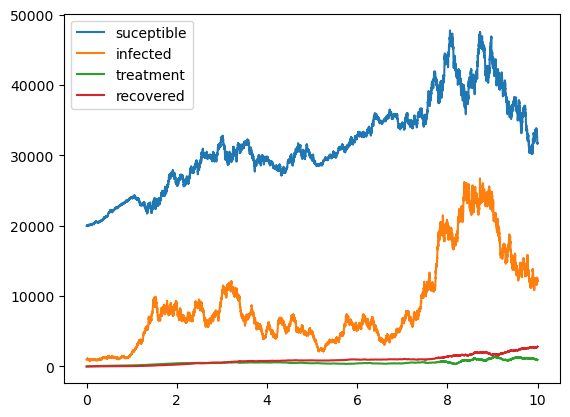

In [99]:
plt.plot(tspan,result[:,0],label = "suceptible")
plt.plot(tspan,result[:,1],label = "infected")
plt.plot(tspan,result[:,2],label = "treatment")
plt.plot(tspan,result[:,3],label = "recovered")
plt.legend()


